## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [86]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [87]:
df.isna().sum()

Number_pregnant          0
Glucose_concentration    0
Blood_pressure           0
Triceps                  0
Insulin                  0
BMI                      0
Pedigree                 0
Age                      0
Class                    0
Group                    0
dtype: int64

In [88]:
df['Group']=label.fit_transform(df['Group'])

In [89]:
df['Group']

0      1
1      2
2      1
3      1
4      2
      ..
763    1
764    0
765    2
766    2
767    0
Name: Group, Length: 768, dtype: int32

In [90]:
from sklearn.compose import ColumnTransformer

In [91]:
oneHot=pd.get_dummies(df['Group'])

In [92]:
oneHot

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
763,0,1,0,0
764,1,0,0,0
765,0,0,1,0
766,0,0,1,0


In [93]:
df=df.drop('Group',axis=1)

In [94]:
df = df.join(oneHot)

In [95]:
df

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,0,1,2,3
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,0,1,0,0
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,0,0,1,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,0,1,0,0
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,0,1,0,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,0,1,0,0
764,2,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,1,0,0,0
765,5,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,0,0,1,0
766,1,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,0,0,1,0


In [96]:
X=df.drop('Class',axis=1).values
y=df['Class'].values

In [97]:
X.shape

(768, 12)

In [98]:
y.shape

(768,)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.90832902,  0.91569367,  0.44912368, ..., -0.59616138,
         1.73582024, -0.56104827],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.59616138,
        -0.57609652,  1.78237784],
       [-1.12606292,  1.38763205,  1.06340683, ..., -0.59616138,
        -0.57609652,  1.78237784],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ...,  1.67739816,
        -0.57609652, -0.56104827],
       [ 2.0708387 , -1.12937261,  0.24436264, ...,  1.67739816,
        -0.57609652, -0.56104827],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -0.59616138,
        -0.57609652,  1.78237784]])

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [102]:
model=Sequential()

In [103]:
units_1=30
units_2=15
units_3=1
model.add(Dense(units=units_1,activation='relu'))

model.add(Dense(units=units_2,activation='relu'))


model.add(Dense(units=units_3,activation='sigmoid'))

In [104]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [105]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
           verbose=1
          )

Epoch 1/200
614/614 [==============================] - 0s 452us/step - loss: 0.6913 - accuracy: 0.5505
Epoch 2/200
614/614 [==============================] - 0s 74us/step - loss: 0.6211 - accuracy: 0.7085
Epoch 3/200
614/614 [==============================] - 0s 84us/step - loss: 0.5785 - accuracy: 0.7264
Epoch 4/200
614/614 [==============================] - 0s 85us/step - loss: 0.5490 - accuracy: 0.7459
Epoch 5/200
614/614 [==============================] - 0s 76us/step - loss: 0.5272 - accuracy: 0.7410
Epoch 6/200
614/614 [==============================] - 0s 132us/step - loss: 0.5111 - accuracy: 0.7443
Epoch 7/200
614/614 [==============================] - 0s 135us/step - loss: 0.4989 - accuracy: 0.7557
Epoch 8/200
614/614 [==============================] - 0s 148us/step - loss: 0.4885 - accuracy: 0.7622
Epoch 9/200
614/614 [==============================] - 0s 156us/step - loss: 0.4807 - accuracy: 0.7638
Epoch 10/200
614/614 [==============================] - 0s 148us/step - loss:

614/614 [==============================] - 0s 78us/step - loss: 0.2173 - accuracy: 0.9153
Epoch 160/200
614/614 [==============================] - 0s 114us/step - loss: 0.2159 - accuracy: 0.9169
Epoch 161/200
614/614 [==============================] - 0s 107us/step - loss: 0.2172 - accuracy: 0.9055
Epoch 162/200
614/614 [==============================] - 0s 68us/step - loss: 0.2147 - accuracy: 0.9137
Epoch 163/200
614/614 [==============================] - 0s 78us/step - loss: 0.2138 - accuracy: 0.9169
Epoch 164/200
614/614 [==============================] - 0s 76us/step - loss: 0.2115 - accuracy: 0.9235
Epoch 165/200
614/614 [==============================] - 0s 84us/step - loss: 0.2098 - accuracy: 0.9202
Epoch 166/200
614/614 [==============================] - 0s 80us/step - loss: 0.2119 - accuracy: 0.9153
Epoch 167/200
614/614 [==============================] - 0s 78us/step - loss: 0.2086 - accuracy: 0.9104
Epoch 168/200
614/614 [==============================] - 0s 82us/step - loss

In [106]:
model.history.history

{'loss': [0.6913141091794067,
  0.6210690610571871,
  0.5784721993856399,
  0.5489942998373547,
  0.5272129630421194,
  0.5111323649409539,
  0.49887855297579436,
  0.48851332641191514,
  0.48066247121130606,
  0.4741316742539794,
  0.4699215345351626,
  0.465310197893882,
  0.46087805640425666,
  0.4572983912225655,
  0.4541755847705692,
  0.4503444421563164,
  0.4463294850304383,
  0.4434761742330141,
  0.4406631460795573,
  0.43715143378472093,
  0.43534012968843067,
  0.4333935647911668,
  0.4307340945599522,
  0.42792451371975754,
  0.42500347481488404,
  0.4232561914462608,
  0.4218525494348731,
  0.4199117477437184,
  0.41704254769735305,
  0.41430701223180816,
  0.41150406459255406,
  0.4101219293737256,
  0.40837123727953784,
  0.4057832128256074,
  0.40379217393235195,
  0.40200604095521114,
  0.3994861548032357,
  0.39877046377728737,
  0.396380519731037,
  0.39471725386594714,
  0.39118775919516624,
  0.3914310419598309,
  0.38842680069833313,
  0.38606499970347563,
  0.384

In [107]:
model_loss = pd.DataFrame(model.history.history)

In [108]:
model_loss

,loss,accuracy
0,0.691314,0.550489
1,0.621069,0.708469
2,0.578472,0.726384
3,0.548994,0.745928
4,0.527213,0.741042
...,...,...
195,0.180738,0.934853
196,0.179839,0.938111
197,0.179600,0.936482
198,0.176927,0.939739


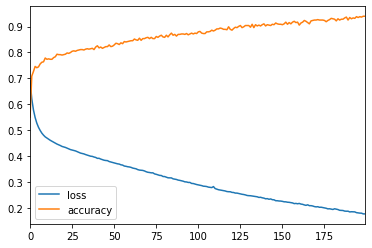

In [109]:
model_loss.plot()

In [110]:
predictions = model.predict_classes(X_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.63      0.68      0.65        47

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.79      0.78      0.78       154



In [113]:
print(confusion_matrix(y_test,predictions))

[[88 19]
 [15 32]]


In [123]:
units_1=30
units_2=15
units_3=1
model.add(Dense(units=units_1,activation='relu', input_dim = 11))

model.add(Dense(units=units_2,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=units_2,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=units_3,activation='sigmoid'))

In [124]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [125]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
           verbose=1,
          validation_data=(X_test, y_test)
          )

Train on 614 samples, validate on 154 samples
Epoch 1/50
614/614 [==============================] - 1s 1ms/step - loss: 0.6617 - accuracy: 0.9495 - val_loss: 0.6737 - val_accuracy: 0.7597
Epoch 2/50
614/614 [==============================] - 0s 107us/step - loss: 0.6209 - accuracy: 0.9886 - val_loss: 0.6531 - val_accuracy: 0.7468
Epoch 3/50
614/614 [==============================] - 0s 130us/step - loss: 0.5677 - accuracy: 0.9821 - val_loss: 0.6239 - val_accuracy: 0.7597
Epoch 4/50
614/614 [==============================] - 0s 122us/step - loss: 0.5040 - accuracy: 0.9756 - val_loss: 0.6064 - val_accuracy: 0.7403
Epoch 5/50
614/614 [==============================] - 0s 128us/step - loss: 0.4314 - accuracy: 0.9642 - val_loss: 0.5709 - val_accuracy: 0.7597
Epoch 6/50
614/614 [==============================] - 0s 133us/step - loss: 0.3647 - accuracy: 0.9642 - val_loss: 0.5937 - val_accuracy: 0.7403
Epoch 7/50
614/614 [==============================] - 0s 164us/step - loss: 0.2807 - accurac

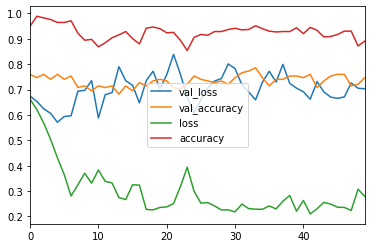

In [126]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
This shows we need to use early stopping

In [142]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [148]:
units_1=30
units_2=15
units_3=1
model.add(Dense(units=units_1,activation='relu', input_dim = 11))

model.add(Dense(units=units_2,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=units_2,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=units_3,activation='sigmoid'))

In [149]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'],)

In [150]:
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=2)
es1 = EarlyStopping(monitor='val_accuracy', mode='max',verbose=1,patience=2)

In [151]:
model.fit(x=X_train, 
          y=y_train, 
callbacks=[es],
          epochs=50,
           verbose=1,
          validation_data=(X_test, y_test),
      
          )

Train on 614 samples, validate on 154 samples
Epoch 1/50
614/614 [==============================] - 3s 4ms/step - loss: 0.6800 - accuracy: 0.6303 - val_loss: 0.6534 - val_accuracy: 0.6948
Epoch 2/50
614/614 [==============================] - 0s 299us/step - loss: 0.6671 - accuracy: 0.6401 - val_loss: 0.6340 - val_accuracy: 0.6948
Epoch 3/50
614/614 [==============================] - 0s 300us/step - loss: 0.6582 - accuracy: 0.6401 - val_loss: 0.6284 - val_accuracy: 0.6948
Epoch 4/50
614/614 [==============================] - 0s 291us/step - loss: 0.6617 - accuracy: 0.6401 - val_loss: 0.6266 - val_accuracy: 0.6948
Epoch 5/50
614/614 [==============================] - 0s 325us/step - loss: 0.6538 - accuracy: 0.6401 - val_loss: 0.6228 - val_accuracy: 0.6948
Epoch 6/50
614/614 [==============================] - 0s 331us/step - loss: 0.6545 - accuracy: 0.6401 - val_loss: 0.6249 - val_accuracy: 0.6948
Epoch 7/50
614/614 [==============================] - 0s 234us/step - loss: 0.6565 - accurac

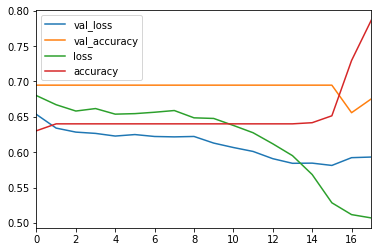

In [152]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

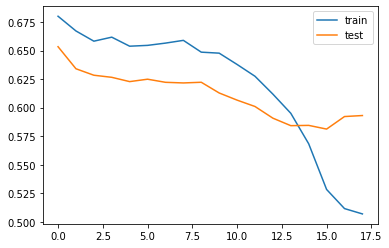

In [155]:
from matplotlib import pyplot
pyplot.plot(model.history.history['loss'], label='train')
pyplot.plot(model.history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [156]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

In [157]:
print(train_acc)

[0.4910605391578488, 0.8078175783157349]


In [162]:
model.evaluate(X_train, y_train, verbose=0)

[0.4910605391578488, 0.8078175783157349]

In [163]:
print(test_acc)

[0.5930990220664384, 0.6753246784210205]


In [164]:
import seaborn as sns